# 1. Packages

In [12]:
pip install python-utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install contentstack_utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

# 2. Logistic Regression

- Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
    - You have historical data from previous applicants that you can use as a training set for logistic regression.
    - For each training example, you have the applicant’s scores on two exams and the admissions decision.
    - Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

Loading Dataset

In [6]:
X_train, y_train = load_data("ex2data1.txt")

Veiwing Variables

In [7]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [8]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


Dimensions of Variables

In [9]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


Visualizing Data

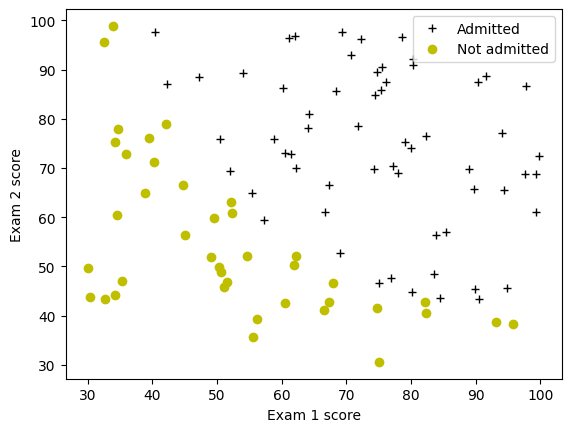

In [10]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

1. Sigmond Function

In [16]:
def sigmoid(z):

    #Args: z (ndarray): A scalar, numpy array of any size.
    
    #Returns: g (ndarray): sigmoid(z), with the same shape as z
    g = 1 / (1 + np.exp(-z))

    return g

In [17]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


In [18]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


2. Cost Function for LR

In [19]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
    loss_sum = 0 
    
    # Loop over each training example
    for i in range(m): 
   
    # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = np.dot(X, w) + b 
        
        # Loop over each feature
        for j in range(n): 
            
            # Add the corresponding term to z_wb
            z_wb_ij = np.dot(X,w)+b # Your code here to calculate w[j] * X[i][j]
            z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
        
        # Add the bias term to z_wb
        z_wb += b # equivalent to z_wb = z_wb + b

        f_wb = sigmoid(z_wb)# Your code here to calculate prediction f_wb for a training example
        loss = -y * np.log(f_wb) - (1-y) * np.log(1-f_wb) # Your code here to calculate loss for a training example

        loss_sum += loss # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum
    
    
    ### END CODE HERE ### 

    return total_cost

In [ ]:
def compute_cost(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m, n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: Regularization parameter (not used in this version)

    Returns:
      total_cost: scalar cost
    """
    
    ### START CODE HERE ###
    
    loss_sum = 0
    
    z_wb = np.dot(X, w) + b
    
    

In [21]:
def compute_cost(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m, n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: Regularization parameter (not used in this version)

    Returns:
      total_cost: scalar cost
    """

    m = len(y)

    # Calculate the linear combination of inputs and parameters
    z = np.dot(X, w) + b

    # Calculate the sigmoid of z
    f_wb = sigmoid(z)

    # Calculate the logistic loss (cross-entropy) for all examples
    loss = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)

    # Calculate the mean loss
    total_cost = (1 / m) * np.sum(loss)

    return total_cost

In [22]:
 m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [23]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

Cost at test w,b: 0.218
All tests passed!


3. Please complete the compute_gradient function